In [2]:
import torch
import subprocess
import numpy as np
import torch.optim as optim
from math import *
import model as model
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [3]:
dim = 3
potential1 = model.init_model(dim);

In [4]:
def compute_energy2(dim1,value):
    xlist = np.linspace(-pi, pi, 301)
    ylist = np.linspace(-pi, pi, 301)
    X, Y = np.meshgrid(xlist, ylist)
    inputs = torch.zeros(X.shape[0]*X.shape[1],dim)
    ii = 0
    for i in range(3):
        if i ==dim1:
            inputs[:,dim1] =value;
        else:
            if ii == 0:    
                inputs[:,i] = torch.tensor(X.reshape(-1));
                ii += 1
            else:
                if ii == 1:
                    inputs[:,i] = torch.tensor(Y.reshape(-1));
    Z = potential1.bias_potential(inputs.T,1)
    return X,Y,Z.reshape(X.shape).detach().numpy() 

In [5]:
def compute_energy(dim1,dim2,vec):
    xlist = np.linspace(-pi, pi, 301)
    ylist = np.linspace(-pi, pi, 301)
    X, Y = np.meshgrid(xlist, ylist)
    inputs = torch.zeros(X.shape[0]*X.shape[1],dim)
    for i in range(dim):
        inputs[:,i] =vec[i];
    inputs[:,dim1] = torch.tensor(X.reshape(-1));
    inputs[:,dim2] = torch.tensor(Y.reshape(-1));
    Z = potential1.bias_potential(inputs.T,1)
    return X,Y,Z.reshape(X.shape).detach().numpy() 

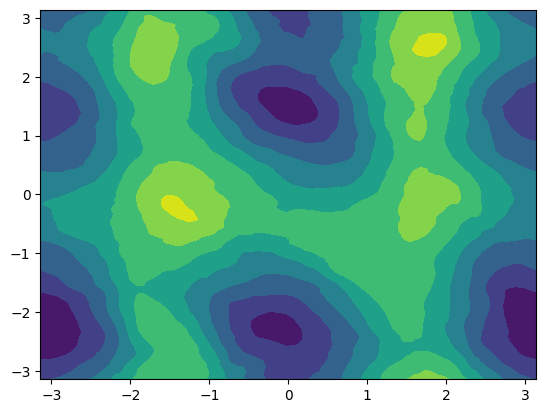

In [8]:
potential1.load_state_dict(torch.load(f"./model_save/potential20.pt"))
value_vec =np.zeros(dim)
value_vec[0] = 1.5
value_vec[1] = 1
value_vec[2] = 1.5
X,Y,Z = compute_energy(0,1,value_vec)
plt.contourf(X,Y,Z)
np.savez(f"example_2D_example1_ome1_phi1.npz",X=X,Y=Y,Z=Z)
X,Y,Z = compute_energy(1,2,value_vec)
np.savez(f"example_2D_example1_phi1_psi1.npz",X=X,Y=Y,Z=Z)
X,Y,Z = compute_energy(0,2,value_vec)
np.savez(f"example_2D_example1_ome1_psi1.npz",X=X,Y=Y,Z=Z)

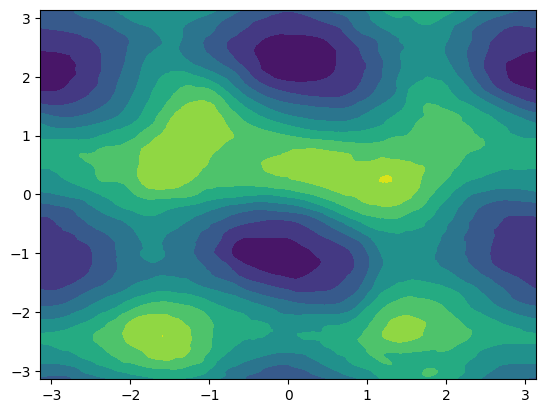

In [9]:
potential1.load_state_dict(torch.load(f"./model_save/potential20.pt"))
value_vec =np.zeros(dim)
value_vec[0] = 0.0
value_vec[1] = 2.0
value_vec[2] = -1.0
X,Y,Z = compute_energy(0,1,value_vec)
plt.contourf(X,Y,Z)
np.savez(f"example_2D_example2_ome1_phi1.npz",X=X,Y=Y,Z=Z)
X,Y,Z = compute_energy(1,2,value_vec)
np.savez(f"example_2D_example2_phi1_psi1.npz",X=X,Y=Y,Z=Z)
X,Y,Z = compute_energy(0,2,value_vec)
np.savez(f"example_2D_example2_ome1_psi1.npz",X=X,Y=Y,Z=Z)

In [10]:
potential1.load_state_dict(torch.load(f"./model_save/potential19.pt"))
for i in range(-3,3):
    X,Y,Z = compute_energy2(0,i)
    np.savez(f"ome_{i}.npz",X=X,Y=Y,Z=Z)
    
for i in range(-3,3):
    X,Y,Z = compute_energy2(0,i+0.5)
    np.savez(f"ome_{i+0.5}.npz",X=X,Y=Y,Z=Z)

In [11]:
potential1.load_state_dict(torch.load(f"./model_save/potential19.pt"))
for i in range(-3,3):
    X,Y,Z = compute_energy2(1,i)
    np.savez(f"phi_{i}.npz",X=X,Y=Y,Z=Z)
for i in range(-3,3):
    X,Y,Z = compute_energy2(1,i+0.5)
    np.savez(f"phi_{i+0.5}.npz",X=X,Y=Y,Z=Z)

In [12]:
potential1.load_state_dict(torch.load(f"./model_save/potential19.pt"))
for i in range(-3,3):
    X,Y,Z = compute_energy2(2,i)
    np.savez(f"psi_{i}.npz",X=X,Y=Y,Z=Z)
for i in range(-3,3):
    X,Y,Z = compute_energy2(2,i+0.5)
    np.savez(f"psi_{i+0.5}.npz",X=X,Y=Y,Z=Z)